In [1]:
from IPython.display import HTML, display

import json
from bson.json_util import dumps
import pandas as pd
from fastparquet import ParquetFile
import time
import datetime
import copy
import numpy as np
import math

import pandas as pd

In [2]:
pf = ParquetFile('28508revents_processed_part.parq')
sdf = pf.to_pandas(index=False)
sdf.head()

,id,permalink,presented_by,title,description,excerpt,category,category_param,conference_category_param,begin_time,...,rsvp.require_terms_agreement,rsvp.terms_label,rsvp.terms_text,rsvp.action,imagery.aws.image,imagery.aws.custom_share_image_w_630_h_1200,dow,repeat_until,repeating,time_tba
0,11049447,/events/2019/10/3/gary-clark-jr-tickets,Official 2019 ACL Fest Late Night Show:,Gary Clark Jr,<p><br></p><p>Stubb's Outdoor&nbsp;</p><p><br>...,Stubb's Outdoor \n\nTo sum up Gary Clark Jr. i...,Music,music,,2019-10-03T19:00:00-05:00,...,NaN,None,None,None,None,None,NaN,None,NaN,NaN
1,11049456,/events/2019/10/3/hippie-sabotage-w-sebastian-...,Official 2019 ACL Fest Late Night Show:,Hippie Sabotage w/ Sebastian Paul,"<p><br></p><p></p><p><a target=""_blank"" href=""...",Hippie Sabotage w/ SEBASTIAN PAUL 2019 ACL Fes...,Music,music,,2019-10-03T20:00:00-05:00,...,NaN,None,None,None,None,None,NaN,None,NaN,NaN
2,11049430,/events/2019/10/3/fidlar-w-xetas-tickets,Official 2019 ACL Fest Late Night Show:,FIDLAR w/ XETAS,<p><br></p><p>FIDLAR are slackers at heart. Th...,FIDLAR are slackers at heart. The only thing t...,Music,music,,2019-10-03T18:30:00-05:00,...,NaN,None,None,None,None,None,NaN,None,NaN,NaN
3,11186444,/events/2019/10/3/that-jokes-new-comedy-open-m...,Misfits Comedy Presents,That Joke's New! Comedy Open-Mic,<p><br></p><p></p><p>Got jokes? Come make us l...,Got jokes? Come make us laugh at this weekly T...,Comedy,comedy,,2019-10-03T20:00:00-05:00,...,NaN,None,None,None,None,None,NaN,None,NaN,NaN
4,11141496,/events/2019/10/3/hear-me-bitch-90s-birthday-b...,,Hear Me Bitch 90’s Birthday Bash Comedy Show,<div>Hear Me Bitch 90’s Birthday Bash Comedy S...,Hear Me Bitch 90’s Birthday Bash Comedy Show \...,Comedy,comedy,,2019-10-03T19:30:00-05:00,...,NaN,None,None,None,None,None,NaN,None,NaN,NaN


In [4]:
sdf.columns.values

array(['id', 'permalink', 'presented_by', 'title', 'description',
       'excerpt', 'category', 'category_param',
       'conference_category_param', 'begin_time',
       'tz_adjusted_begin_date', 'tz_adjusted_end_date', 'begin_date',
       'past', 'end_date', 'end_time', 'votes', 'ticket_info',
       'allstar_votes', 'is_lens', 'is_eventbrite', 'amazon_affiliate',
       'eventbrite_id', 'ticket_onsale_time', 'tickets_onsale_today',
       'is_free', 'is_ongoing', 'rating', 'doors', 'popularity',
       'sold_out', 'favorite', 'artists', 'rsvp', 'buy_url', 'eager',
       'imagery.photo', 'imagery.poster',
       'imagery.aws.cover_image_w_1200_h_450',
       'imagery.aws.cover_image_h_300_w_864',
       'imagery.aws.cover_image_h_250_w_680',
       'imagery.aws.cover_image_h_630_w_1200',
       'imagery.aws.cover_image_h_50_w_50', 'tracking.impression',
       'tracking.hover', 'tracking.click', 'tracking_urls.impression',
       'tracking_urls.hover', 'tracking_urls.click', 'actio

In [5]:
sdf.drop_duplicates(subset='id',inplace=True)

In [6]:
len(sdf)

28007

In [144]:
a=sdf['venue.title'].value_counts()

In [157]:
sdf[sdf['venue.title'].str.contains('Secret')][['title','venue.title','venue.id','venue.address','votes']]

,title,venue.title,venue.id,venue.address,votes
992,The Deep End,Secret Location,288952,None,2134
1427,Planetarium Imaginarium: A Super Secret Spacey...,Secret Location,288952,None,9
1476,ubiyu x night w/ Roger Gerressen,Secret Location,288952,None,0
1607,Kid Karate,Secret Location,288952,None,8
2742,ubiyu x night w/ Paolo Rocco (RAWMoments),Secret Location,288952,None,1
4497,"no. vi — classified, night II","Secret Location, 10 Minutes from Convention Ce...",76731,None,1
4652,no. vi — classified,"Secret Location, 10 Minutes from Convention Ce...",76731,None,0
7329,"2000's & Late, Late Night Throwback EDM Party",Secret Location Downtown,375864,"Downtown, Austin, TX",2
9647,Outdoor Yoga + Brunch,"Secret Location, South Austin",444986,South Austin,2
20272,"Homeless 3:16 ft. David Liebe Hart, Dope Knife...",Secret Location,288952,None,3


In [121]:
df=pd.read_csv('28508_proc_ticket_free.csv')

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [125]:
df.drop_duplicates(subset='id',inplace=True)

In [27]:
df['artists']=sdf['artists']

In [28]:
del sdf

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28007 entries, 0 to 28507
Data columns (total 39 columns):
Unnamed: 0               28007 non-null int64
id                       28007 non-null int64
presented_by             10495 non-null object
title                    28007 non-null object
category                 28007 non-null object
begin_time               28007 non-null object
past                     28007 non-null bool
end_time                 12644 non-null object
votes                    28007 non-null int64
is_eventbrite            28007 non-null bool
amazon_affiliate         28007 non-null bool
eventbrite_id            1255 non-null float64
is_free                  28007 non-null bool
rating                   0 non-null float64
doors                    28007 non-null bool
popularity               28007 non-null float64
sold_out                 28007 non-null bool
favorite                 28007 non-null bool
artists                  28007 non-null object
rsvp             

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'presented_by', 'title', 'category', 'begin_time',
       'past', 'end_time', 'votes', 'is_eventbrite', 'amazon_affiliate',
       'eventbrite_id', 'is_free', 'rating', 'doors', 'popularity', 'sold_out',
       'favorite', 'artists', 'rsvp', 'eager', 'venue.id', 'venue.title',
       'venue.latitude', 'venue.longitude', 'venue.popularity',
       'venue.address', 'venue.city', 'venue.state', 'venue.zip',
       'giveaway.action', 'giveaway.ask21', 'ticket_allages',
       'ticket_price_low', 'ticket_price_max', 'min_age',
       'artist.popularity.sum', 'artist.popularity.avg',
       'artist.popularity.max'],
      dtype='object')

In [8]:
cols=df.columns.values
usecols=['presented_by', 'title', 'category', 'begin_time', 'past',
       'end_time', 'votes', 'is_eventbrite', 'is_free', 'doors',
       'popularity','venue.id', 'venue.title',
       'venue.latitude',
       'venue.longitude', 'venue.popularity','venue.zip', 'ticket_allages',
       'ticket_price_low', 'ticket_price_max', 'min_age', 'free']

In [72]:
# deal with artist column

In [9]:
# plot the popularities
Evotes=df.votes.values
Epop=df.popularity.values
Vpop=df['venue.popularity'].values

In [24]:
import matplotlib.pyplot as plt


In [19]:
ndf=pd.read_csv('fullevents_proc_tickets_art.csv')

In [20]:
# plot the histogram of the votes in bins
ndf.drop_duplicates(subset='id',inplace=True)

In [26]:
list(x).count([0])

8344

In [21]:
evvot=ndf[['id','votes']]

number of events with the vote 0: 8344


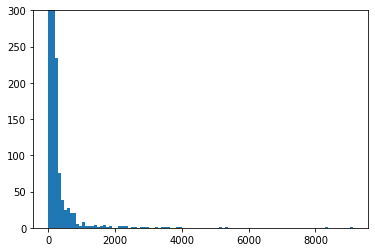

In [28]:
import matplotlib.pyplot as plt
# plot votes distribution for all data
n_bins = 100
x=evvot.votes.values
# subset votes to those not 1
xx = [c for c in x if c !=0]
fig = plt.hist(xx,bins=n_bins)
plt.ylim([0,300])
print("number of events with the vote 0:",list(x).count([0]))


In [119]:
# get total number of samples above n
n=50
print("total number of samples for the events is:",len(evvot))
print("total number of events with votes above ",n," is:",len(evvot.loc[evvot['votes']>=n]))
print("percent to total data of those events: ",len(evvot.loc[evvot['votes']>=n])/len(evvot)*100,"%")


total number of samples for the events is: 41865
total number of events with votes above  50  is: 2289
percent to total data of those events:  5.467574346112505 %


In [131]:
# look at the distribution of events with votes>50
newevdf=ndf.loc[ndf['votes']>=50]
newevdf.head()

,id,presented_by,title,category,begin_time,past,end_time,votes,is_eventbrite,amazon_affiliate,...,venue.longitude,venue.popularity,venue.address,venue.city,venue.state,venue.zip,ticket_allages,ticket_price_low,ticket_price_max,min_age
0,11049447,Official 2019 ACL Fest Late Night Show:,Gary Clark Jr,Music,2019-10-03T19:00:00-05:00,False,NaN,784,False,True,...,-97.736175,15.0,801 Red River,Austin,TX,78701,True,0.0,0.0,NaN
1,11049456,Official 2019 ACL Fest Late Night Show:,Hippie Sabotage w/ Sebastian Paul,Music,2019-10-03T20:00:00-05:00,False,NaN,223,False,True,...,-97.728516,15.0,2015 E. Riverside Dr.,Austin,TX,78741,False,0.0,0.0,18.0
2,11049430,Official 2019 ACL Fest Late Night Show:,FIDLAR w/ XETAS,Music,2019-10-03T18:30:00-05:00,False,NaN,163,False,True,...,-97.729386,15.0,1308 E. Fourth,Austin,TX,78702,True,0.0,0.0,NaN
3,11186444,Misfits Comedy Presents,That Joke's New! Comedy Open-Mic,Comedy,2019-10-03T20:00:00-05:00,False,NaN,151,False,True,...,NaN,1.0,1905 Aldrich St.,Austin,TX,NaN,False,0.0,0.0,NaN
4,11141496,NaN,Hear Me Bitch 90’s Birthday Bash Comedy Show,Comedy,2019-10-03T19:30:00-05:00,False,NaN,126,True,True,...,-97.745230,1.0,616 Lavaca St,Austin,TX,78701,False,10.0,12.0,NaN


In [132]:
newevdf.drop_duplicates(subset='id',inplace=True)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
newevdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 41761
Data columns (total 33 columns):
id                  1980 non-null int64
presented_by        1213 non-null object
title               1980 non-null object
category            1980 non-null object
begin_time          1980 non-null object
past                1980 non-null bool
end_time            339 non-null object
votes               1980 non-null int64
is_eventbrite       1980 non-null bool
amazon_affiliate    1980 non-null bool
eventbrite_id       262 non-null float64
is_free             1980 non-null bool
rating              0 non-null float64
doors               1980 non-null bool
popularity          1980 non-null float64
sold_out            1980 non-null bool
favorite            1980 non-null bool
artists             1980 non-null object
rsvp                1775 non-null float64
eager               1980 non-null bool
venue.id            1980 non-null int64
venue.title         1980 non-null object
venue.lati

In [126]:
# take a look at the rare events
df.drop_duplicates(subset='id',inplace=True)
df.loc[df['votes']>=500]

,Unnamed: 0,id,presented_by,title,category,begin_time,past,end_time,votes,is_eventbrite,...,venue.zip,giveaway.action,giveaway.ask21,ticket_allages,ticket_price_low,ticket_price_max,min_age,artist.popularity.sum,artist.popularity.avg,artist.popularity.max
0,0,11049447,Official 2019 ACL Fest Late Night Show:,Gary Clark Jr,Music,2019-10-03T19:00:00-05:00,False,NaN,784,False,...,78701,NaN,NaN,True,0.0,0.0,NaN,73238.0,73238.0,73238.0
223,223,11003779,NaN,14th Annual Trans-Pecos Festival of Music + Love,Music,2019-09-26T12:00:00-05:00,True,NaN,509,False,...,NaN,NaN,NaN,False,250.0,325.0,NaN,259236.0,14402.0,14402.0
340,340,10975674,NaN,AustOberfest: Austin Oktoberfest,Food + Drink,2019-09-28T17:00:00-05:00,True,NaN,582,True,...,78701,NaN,NaN,False,25.0,50.0,NaN,0.0,0.0,0.0
344,344,11161080,NaN,Altercation Comedy Festival Day Four,Comedy,2019-09-28T18:30:00-05:00,True,NaN,647,False,...,78752,NaN,NaN,True,20.0,NaN,NaN,100.0,20.0,20.0
539,539,11161079,NaN,Altercation Comedy Festival Day Three,Comedy,2019-09-27T18:30:00-05:00,True,NaN,645,False,...,78752,NaN,NaN,True,20.0,NaN,NaN,12.0,2.0,2.0
682,682,11161078,NaN,Altercation Comedy Festival Day Two,Comedy,2019-09-26T18:00:00-05:00,True,NaN,641,False,...,78752,NaN,NaN,True,20.0,NaN,NaN,36.0,9.0,9.0
785,785,10819984,NaN,Altercation Comedy Festival Day One,Comedy,2019-09-25T18:00:00-05:00,True,NaN,684,False,...,78752,NaN,NaN,True,20.0,NaN,NaN,10.0,2.0,2.0
992,992,10975850,Do512 & Deep Eddy Vodka Present,The Deep End,Happy Hour + Drink Specials,2019-09-23T12:00:00-05:00,True,2019-09-23T18:00:00-05:00,2134,False,...,NaN,NaN,NaN,False,0.0,0.0,21.0,316.0,158.0,158.0
1477,1477,10619987,ACL Live & C3 Present,Deadmau5 - Night One,Music,2019-09-19T18:00:00-05:00,True,NaN,782,False,...,78701,NaN,NaN,False,0.0,0.0,NaN,63208.0,63208.0,63208.0
2919,2919,10075951,NaN,Austin Restaurant Weeks,Food + Drink,2019-08-16T11:00:00-05:00,True,NaN,1728,False,...,NaN,NaN,NaN,False,0.0,0.0,NaN,0.0,0.0,0.0


C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0, 900)

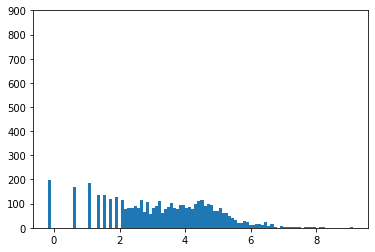

In [49]:
fig = plt.hist(np.log(x-np.mean(x)+1),bins=n_bins)
plt.ylim([0,900])

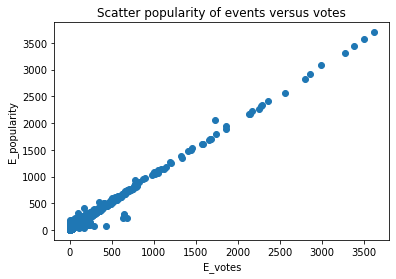

In [27]:
# Plot
plt.scatter(Evotes, Epop)
plt.title('Scatter popularity of events versus votes')
plt.xlabel('E_votes')
plt.ylabel('E_popularity')
plt.show()

In [28]:
print("percentage of 0 Event popularity:", sum(Epop==0)/len(df)*100,"%")
print("percentage of 1 Event popularity:", sum(Epop==1)/len(df)*100,"%")
print("percentage of 2 Event popularity:", sum(Epop==2)/len(df)*100,"%")

percentage of 0 Event popularity: 0.01428214374977684 %
percentage of 1 Event popularity: 16.988609990359553 %
percentage of 2 Event popularity: 9.933230977969794 %


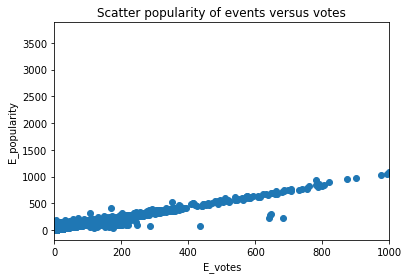

In [29]:
# Plot
plt.scatter(Evotes, Epop)
plt.title('Scatter popularity of events versus votes')
plt.xlabel('E_votes')
plt.ylabel('E_popularity')
plt.xlim([0,1000])
plt.show()

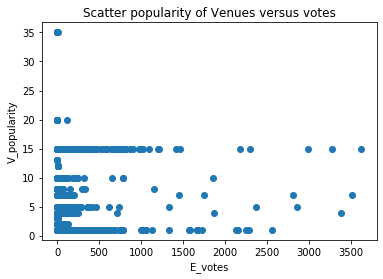

In [22]:
# Plot
plt.scatter(Evotes, Vpop)
plt.title('Scatter popularity of Venues versus votes')
plt.xlabel('E_votes')
plt.ylabel('V_popularity')
plt.show()

In [117]:
print("percentage of Venue popularity=0 :", sum(Vpop==0)/len(df)*100,"%")
print("percentage of Venue popularity=1 :", sum(Vpop==1)/len(df)*100,"%")
print("percentage of Venue popularity=2 :", sum(Vpop==2)/len(df)*100,"%")

percentage of Venue popularity=0 : 0.0 %
percentage of Venue popularity=1 : 74.09219123790481 %
percentage of Venue popularity=2 : 1.7638447530974397 %


In [119]:
df['venue.popularity'].value_counts()/len(df)*100

1.0     74.092191
15.0     9.890385
5.0      7.490984
10.0     3.691934
2.0      1.763845
4.0      1.299675
7.0      1.203271
12.0     0.317778
20.0     0.096404
8.0      0.078552
3.0      0.035705
35.0     0.021423
13.0     0.017853
Name: venue.popularity, dtype: float64

In [124]:
print(sorted(df['venue.popularity'].unique()))
print("the unique # of bins for venue popularity:",len(df['venue.popularity'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0, 12.0, 13.0, 15.0, 20.0, 35.0]
the unique # of bins for venue popularity: 13


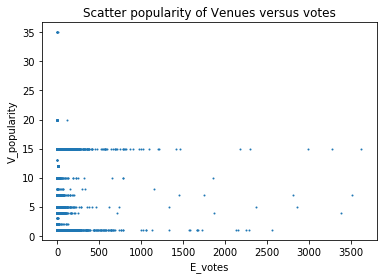

In [14]:
# Plot
plt.scatter(Evotes, Vpop,s=1)
plt.title('Scatter popularity of Venues versus votes')
plt.xlabel('E_votes')
plt.ylabel('V_popularity')
#plt.xlim([-50,900])
plt.show()

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


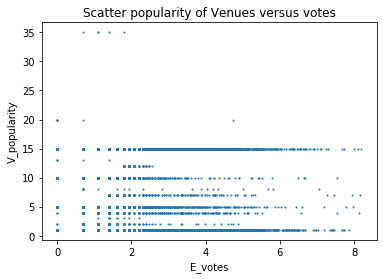

In [13]:
# Plot
plt.scatter(np.log(Evotes), Vpop,s=1)
plt.title('Scatter popularity of Venues versus votes')
plt.xlabel('E_votes')
plt.ylabel('V_popularity')
#plt.xlim([-50,900])
plt.show()

In [29]:
# get artist column andef
e_artist=df.artists.values

In [17]:
len(e_artist)

28007

In [17]:
import json
json.loads(dumps(e_artist[1177][0]))#['popularity']

{'id': 96273,
 'title': 'Big Freedia',
 'permalink': '/artists/big-freedia',
 'data_path': '/artists/96273/quickie',
 'description': 'Big Freedia (pronounced “FREE-da”), known as the Queen of Bounce, is at the forefront of the Bounce rap movement (a subgenre of hip-hop born out of New Orleans and known for its call and response style and lightening speed booty-shaking dance). Performing five out of seven nights in any given week with dancers she calls The Divas, Big Freedia’s show is nothing short of dazzling. She tours every city in America from New York to San Francisco and is always a favorite at festivals such as Electric Forest, Hangout Fest, FunFunFun Fest, SXSW, and Bonnaroo, among many others.\r\n<br><br>\r\nGay and proud, Big Freedia asserts that her (Freedia is a he but uses the feminine pronoun for her stage persona) sexuality has little to do with her music. "All types of people—gay, straight, rich, poor, black, white come to my shows. People just wanna get out and shake th

In [30]:
#get artist_popularity
p_art_avg=[]
p_art_sum=[]
p_art_max=[]
for item in e_artist:
    if len(item)==0:
        p_art_sum+=[0]
        p_art_avg+=[0]
        p_art_max+=[0]
    elif len(item)==1:
        p_art_sum+=[json.loads(dumps(item))[0]['popularity']]
        p_art_avg+=[json.loads(dumps(item))[0]['popularity']]
        p_art_max+=[json.loads(dumps(item))[0]['popularity']]
    else:
        subsum=0
        partmax=0
        for sub in item:
            part=json.loads(dumps(item))[0]['popularity']
            subsum+=part
            if part> partmax: partmax=part
        p_art_sum+=[subsum]
        p_art_avg+=[subsum/len(item)]
        p_art_max+=[partmax]

In [33]:
# place the artist popularity back to df
df['artist.popularity.sum']=p_art_sum
df['artist.popularity.avg']=p_art_avg
df['artist.popularity.max']=p_art_max

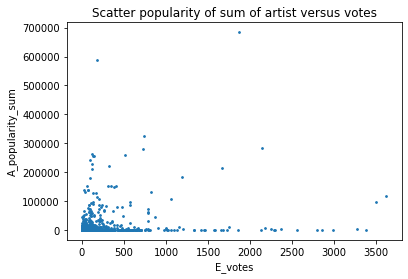

In [36]:
# Plot
plt.scatter(Evotes, p_art_sum,s=3)
plt.title('Scatter popularity of sum of artist versus votes')
plt.xlabel('E_votes')
plt.ylabel('A_popularity_sum')
plt.show()

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


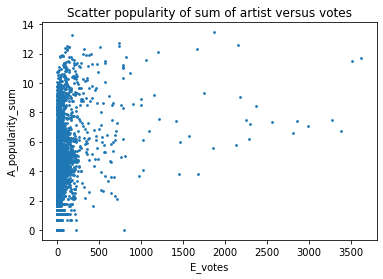

In [37]:
# Plot
plt.scatter(Evotes, np.log(p_art_sum),s=3)
plt.title('Scatter popularity of sum of artist versus votes')
plt.xlabel('E_votes')
plt.ylabel('A_popularity_sum')
plt.show()

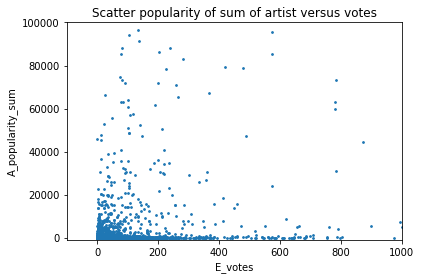

In [38]:
# Plot
plt.scatter(Evotes, p_art_sum,s=3)
plt.title('Scatter popularity of sum of artist versus votes')
plt.xlabel('E_votes')
plt.ylabel('A_popularity_sum')
plt.xlim([-100,1000])
plt.ylim([-1000,100000])
plt.show()

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


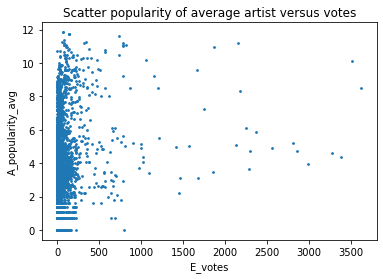

In [39]:
# Plot
plt.scatter(Evotes, np.log(p_art_avg),s=3)
plt.title('Scatter popularity of average artist versus votes')
plt.xlabel('E_votes')
plt.ylabel('A_popularity_avg')
plt.show()

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


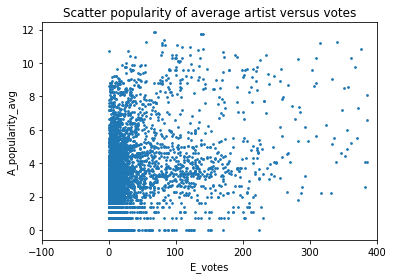

In [42]:
# Plot
plt.scatter(Evotes, np.log(p_art_avg),s=3)
plt.title('Scatter popularity of average artist versus votes')
plt.xlabel('E_votes')
plt.ylabel('A_popularity_avg')
plt.xlim([-100,400])
#plt.ylim([-1000,20000])
plt.show()

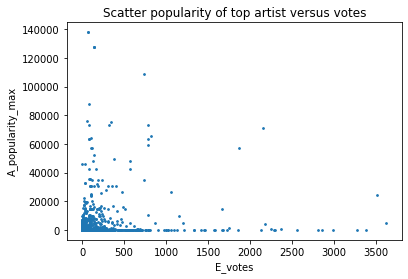

In [48]:
# Plot
plt.scatter(Evotes, p_art_max,s=3)
plt.title('Scatter popularity of top artist versus votes')
plt.xlabel('E_votes')
plt.ylabel('A_popularity_max')
plt.show()

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


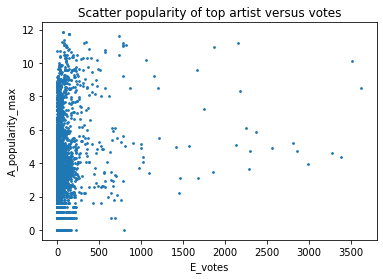

In [43]:
# Plot
plt.scatter(Evotes, np.log(p_art_max),s=3)
plt.title('Scatter popularity of top artist versus votes')
plt.xlabel('E_votes')
plt.ylabel('A_popularity_max')
plt.show()

In [45]:
E_ticket_max=df['ticket_price_max'].values
E_ticket_low=df['ticket_price_low'].values

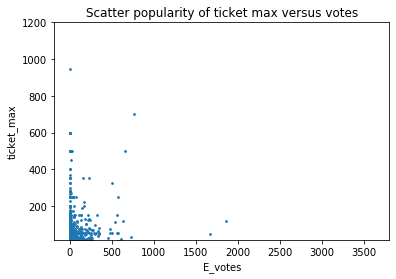

In [46]:
# Plot
plt.scatter(Evotes, E_ticket_max,s=3)
plt.title('Scatter popularity of ticket max versus votes')
plt.xlabel('E_votes')
plt.ylabel('ticket_max')
plt.ylim([15,1200])
plt.show()

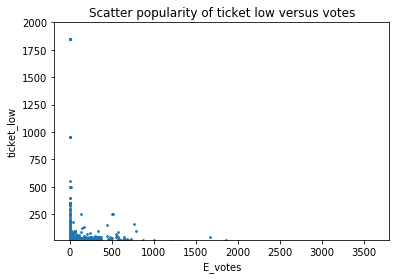

In [47]:
# Plot
plt.scatter(Evotes, E_ticket_low,s=3)
plt.title('Scatter popularity of ticket low versus votes')
plt.xlabel('E_votes')
plt.ylabel('ticket_low')
plt.ylim([15,2000])
plt.show()

In [ ]:
# combine lat/lon to one feature
v_lat=df['venue.latitude'].values()
v_lon=df['venue.longitude'].values()


In [10]:
# reload data,
pf=ParquetFile('full_1st_setoffeat_events4ml.parq')
pdf=pf.to_pandas()

In [11]:
pdf['event_id']=evvot['id'].values

NameError: name 'evvot' is not defined

In [12]:
pdf.drop_duplicates(subset='event_id',inplace=True)

KeyError: Index(['event_id'], dtype='object')

In [20]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40703 entries, 11049447 to 9968570
Data columns (total 24 columns):
category                 40703 non-null int64
past                     40703 non-null int32
votes                    40703 non-null int64
is_eventbrite            40703 non-null int32
is_free                  40703 non-null int32
doors                    40703 non-null int32
sold_out                 40703 non-null int32
venue.id                 40703 non-null int64
venue.popularity         40703 non-null float64
venue.zip                40703 non-null int64
ticket_allages           40703 non-null int32
ticket_price_low         40703 non-null float64
ticket_price_max         40703 non-null float64
min_age                  40703 non-null int32
artist.popularity.sum    40703 non-null float64
artist.popularity.avg    40703 non-null float64
artist.popularity.max    40703 non-null float64
dow                      40703 non-null int64
doy                      40703 non-null in

In [22]:
cols=list(pdf.columns.values)
cols.remove('votes')

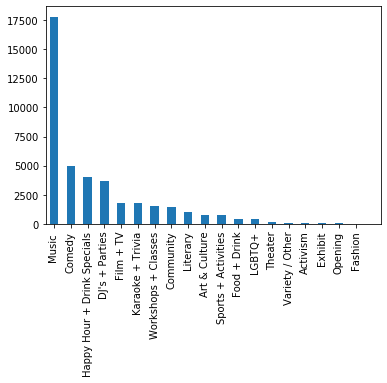

In [41]:
# do a series of plotting on feature and their counts to observe the distributions
mapcat={'Music ': 0, 'Comedy': 1, 'Happy Hour + Drink Specials': 2, "DJ's + Parties": 3, 'Film + TV': 4, 'Karaoke + Trivia': 5, 'Workshops + Classes': 6, 'Community': 7, 'Literary': 8, 'Art & Culture': 9, 'Sports + Activities': 10, 'Food + Drink': 11, 'LGBTQ+': 12, 'Theater': 13, 'Variety / Other': 14, 'Activism': 15, 'Exhibit': 16, 'Opening': 17, 'Fashion': 18, 'Free Week': 19}

n_bins = len(mapcat)
#fig = plt.hist(pdf.category.values,bins=n_bins)
ax=pdf.category.value_counts().plot(kind = 'bar')
# get the categories as labels
ax.set_xticks([x for x in range(0,19)])
ax.set_xticklabels(list(mapcat.keys()))

plt.show()

1    41775
0       90
Name: past, dtype: int64


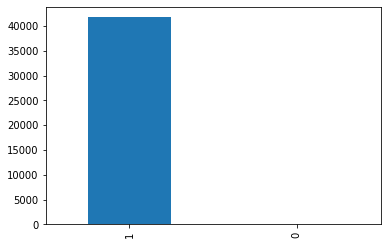

In [14]:
print(pdf.past.value_counts())
ax=pdf.past.value_counts().plot(kind = 'bar')

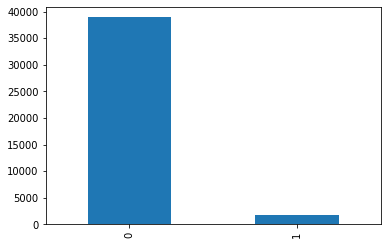

In [44]:
ax=pdf.is_eventbrite.value_counts().plot(kind = 'bar')

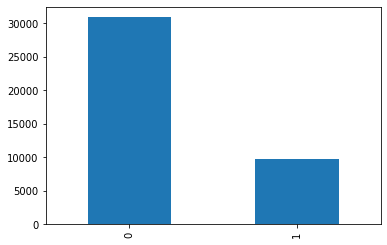

In [45]:
ax=pdf.is_free.value_counts().plot(kind = 'bar')

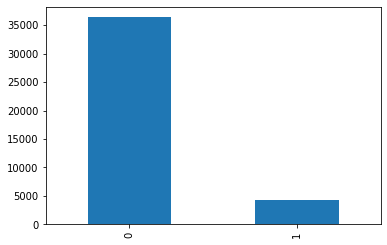

In [46]:
ax=pdf.doors.value_counts().plot(kind = 'bar')

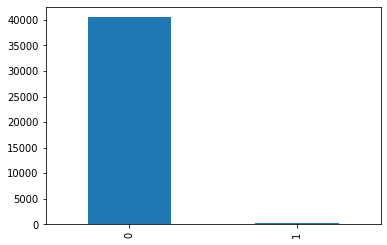

In [47]:
ax=pdf.sold_out.value_counts().plot(kind = 'bar')

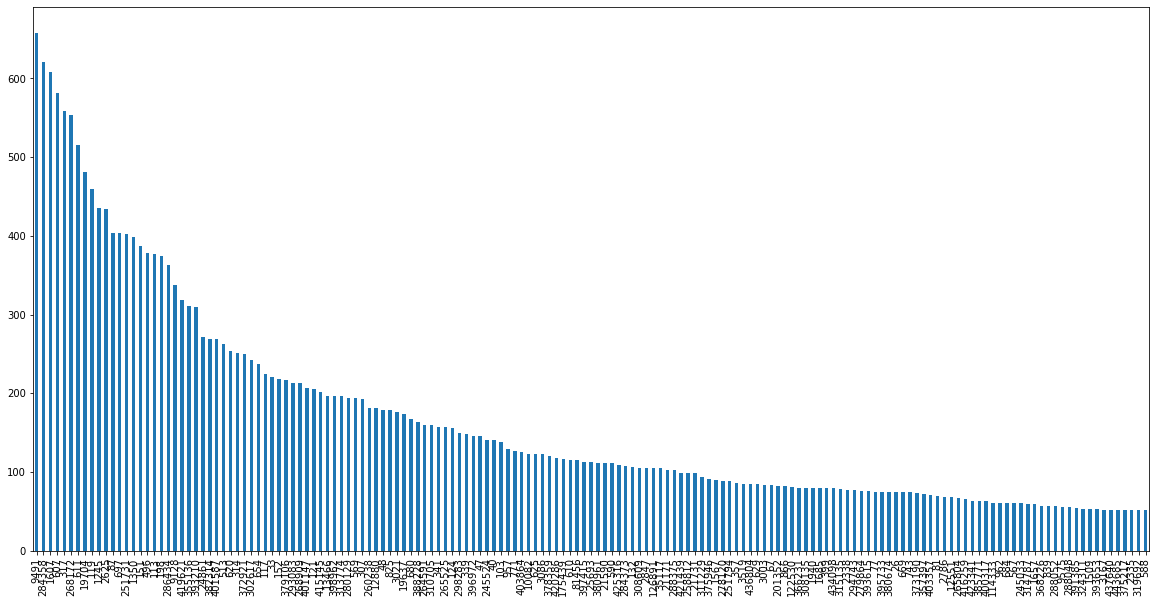

In [64]:
# filter and then show the venue which has 50+ events
venues=pdf['venue.id'].value_counts()
usevenues=venues[venues>50].index.values
tdf=pdf.loc[pdf['venue.id'].isin(usevenues)]
plt.figure(figsize=(20,10))
ax=tdf['venue.id'].value_counts().plot(kind = 'bar')

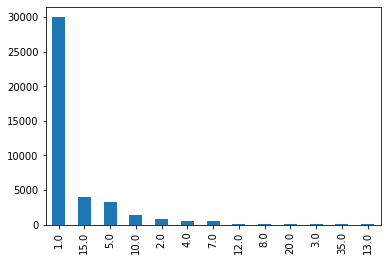

In [62]:
# plot a graph for venue popularity counts
ax=pdf['venue.popularity'].value_counts().plot(kind='bar')

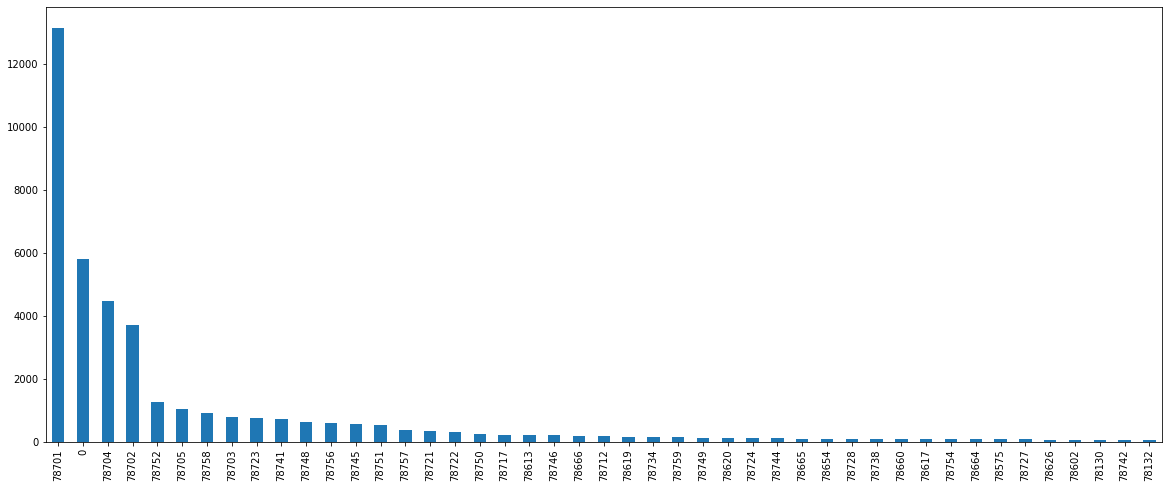

In [70]:
zipct = pdf['venue.zip'].value_counts()
usezips=zipct[zipct>50].index.values
tdf=pdf.loc[pdf['venue.zip'].isin(usezips)]
plt.figure(figsize=(20,8))
ax=tdf['venue.zip'].value_counts().plot(kind='bar')

In [127]:
print("number of zip codes:",len(pdf['venue.zip'].unique()))

number of zip codes: 142


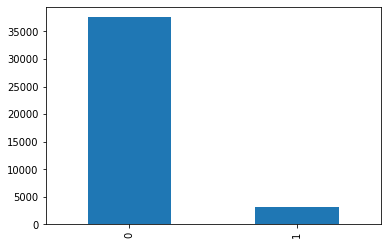

In [68]:
ax=pdf.ticket_allages.value_counts().plot(kind='bar')

In [16]:
tlow = pdf['ticket_price_low'].value_counts()
usetlowct =tlow[tlow>100].index.values
plt.figure(figsize=(20,8))
tdf=pdf.loc[pdf['ticket_price_low'].isin(usetlowct)]
a=tdf.ticket_price_low.value_counts().sort_index().plot(kind='bar')
plt.ylim([0,2500])

NameError: name 'plt' is not defined

(0, 1000)

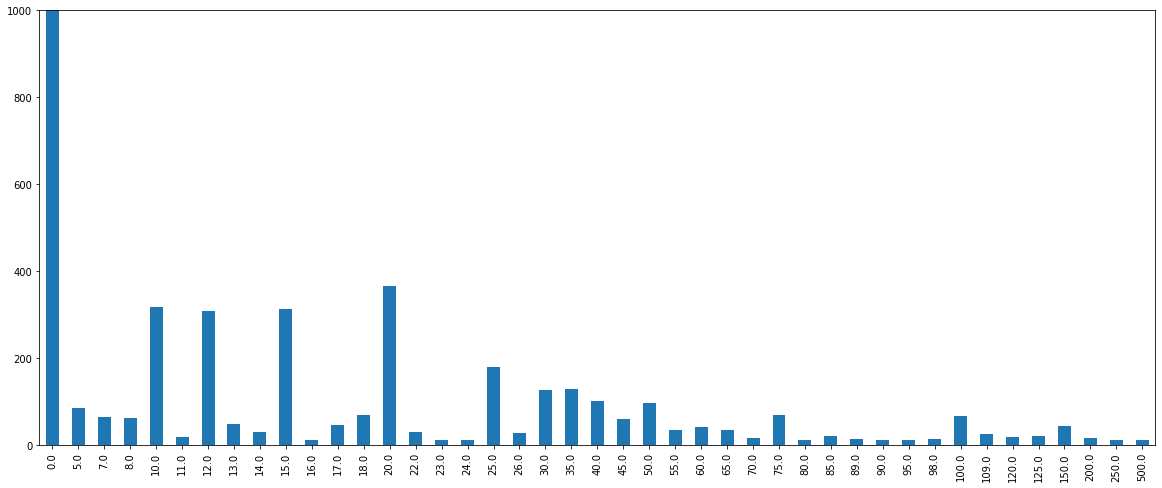

In [89]:
tmax = pdf['ticket_price_max'].value_counts()
usetmaxct =tmax[tmax>10].index.values
plt.figure(figsize=(20,8))
tdf=pdf.loc[pdf['ticket_price_max'].isin(usetmaxct)]
a=tdf.ticket_price_max.value_counts().sort_index().plot(kind='bar')
plt.ylim([0,1000])

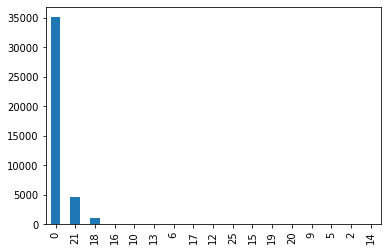

In [86]:
ax=pdf['min_age'].value_counts().plot(kind='bar')

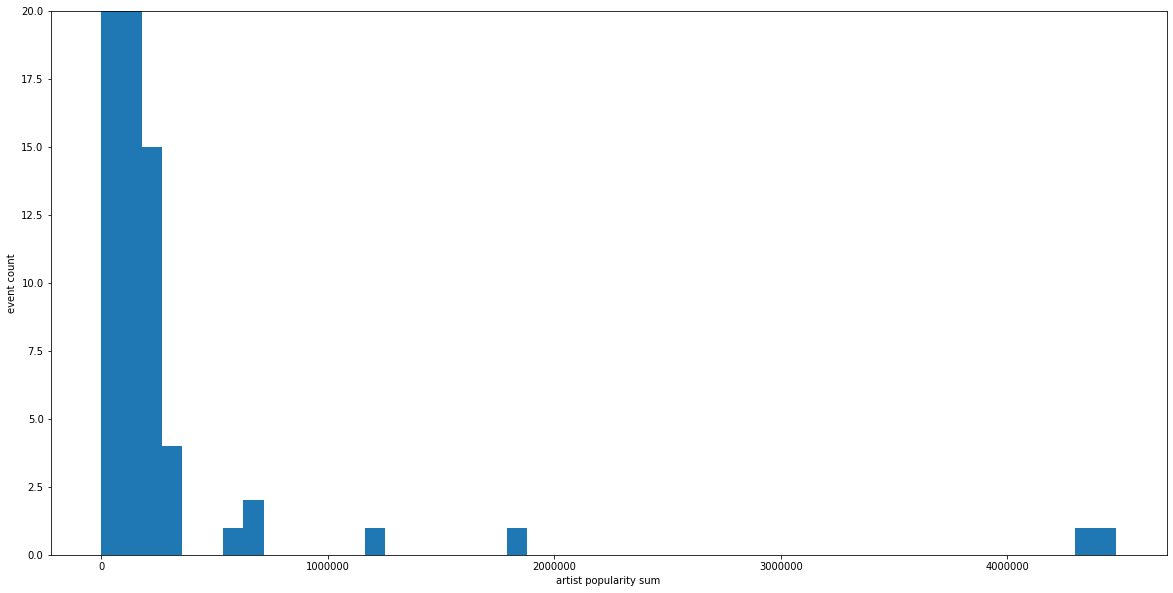

In [102]:
art_ppsum=pdf['artist.popularity.sum'].values
plt.figure(figsize=(20,10))
n_bins= 50
plt.hist(art_ppsum,bins=n_bins)
plt.ylim([0,20])
plt.xlabel('artist popularity sum')
plt.ylabel('event count')
plt.show()

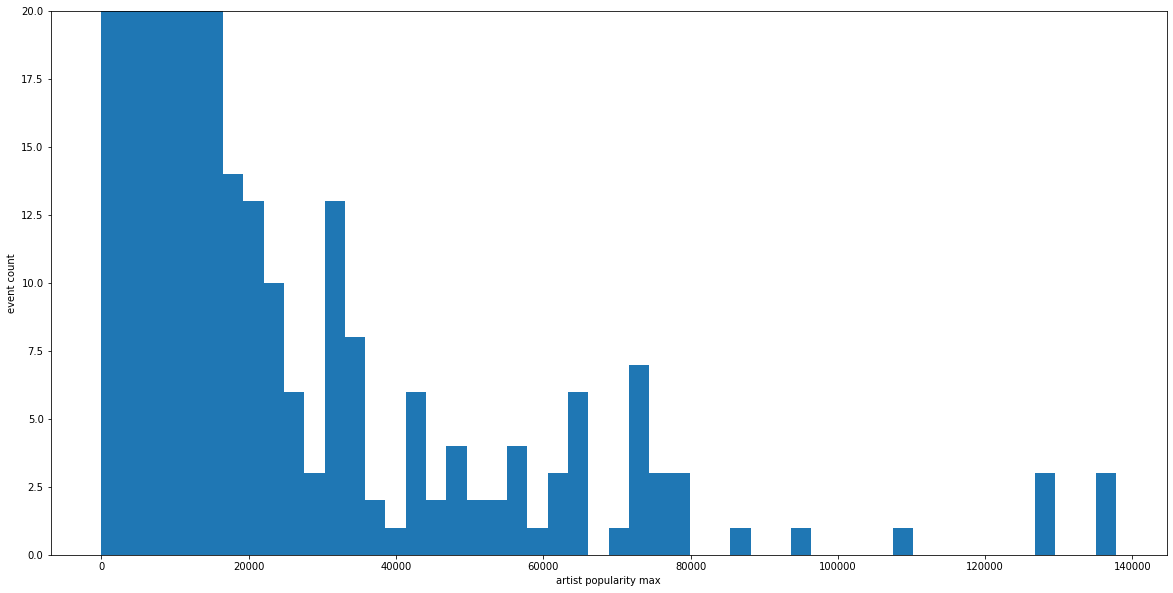

In [103]:
art_ppmax=pdf['artist.popularity.max'].values
plt.figure(figsize=(20,10))
n_bins= 50
plt.hist(art_ppmax,bins=n_bins)
plt.ylim([0,20])
plt.xlabel('artist popularity max')
plt.ylabel('event count')
plt.show()

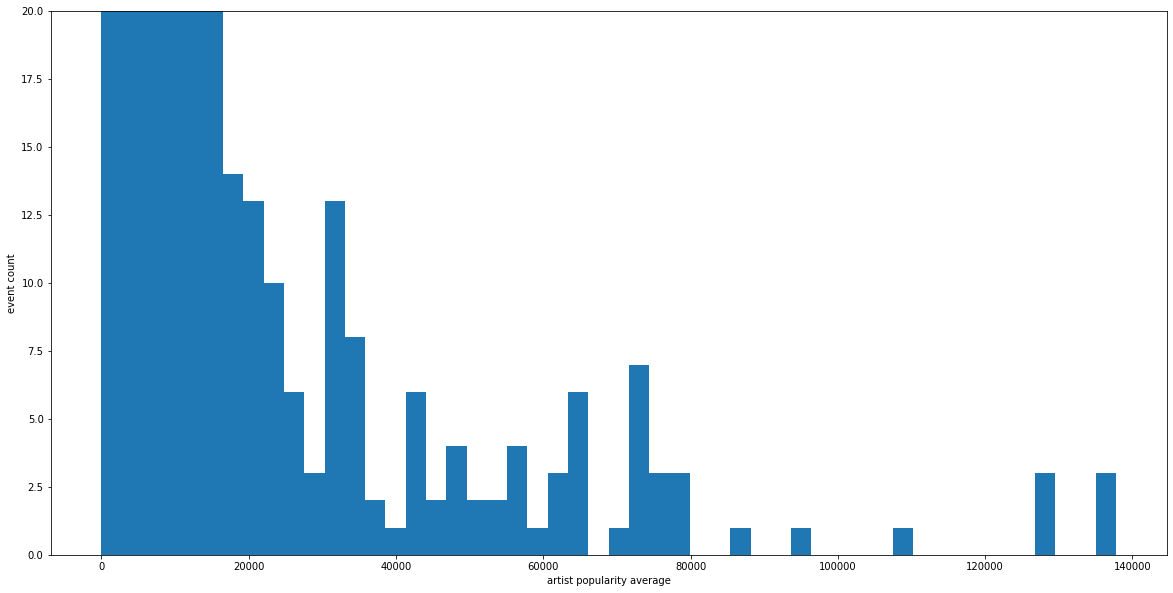

In [105]:
art_ppavg=pdf['artist.popularity.avg'].values
plt.figure(figsize=(20,10))
n_bins= 50
plt.hist(art_ppavg,bins=n_bins)
plt.ylim([0,20])
plt.xlabel('artist popularity average')
plt.ylabel('event count')
plt.show()

#### adjuscting procedures:
##### --should group ticket price to smaller groups
##### --should group age minimum into age groups (cleanup)
##### --should c age groups


In [106]:
art_ppavg

array([73238.,   101.,  1885., ...,     0.,     0.,     0.])

In [107]:
art_ppmax

array([73238.,   101.,  1885., ...,     0.,     0.,     0.])